# What are your chances of winning the lottery? 

In [ ]:
#generate a random sequence of numbers from 1-99
#generate 100000 more sequences to check to simulate player input
#check if the player inputs equal the entire initial sequence
#check if any numbers in the sequences match one or more numbers in the initial sequence
#calculate the chances of picking all five numbers
#calculate the chances of picking 1 or more numbers in combination

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
#use a numpy array to choose the winning numbers
np.random.seed(123)
winning_numbers2 = np.random.randint(0,99,size=(1,6)) #returns a 1 x 5 array of 6 random integers
print('The winning numbers are ' + str(winning_numbers2) + '.')

In [ ]:
#use numpy to generate 100 more random sets to simulate players
np.random.seed(123)
bets = np.random.randint(0,99,size=(100,6)) #returns a 100 x 5 array of 6 random integers
print('The player choices are ' + str(bets) + '.')

In [ ]:
#checks whether any of the sets of bets are equal to the winning numbers
np.equal([winning_numbers2], bets).all(axis=1)

# Womp. You didn't win the lottery. 

What was your chance of winning?

There are 100 numbers to be chosen 6 at a time. The total number of possible combinations is kCr, combinations of k objects taken r at a  time. In this case kCr is 100C6, or 100!/(6!94!), and your chance of winning the lottery is 1 in 100C6.

In [ ]:
#calculate the number of possible combinations
from scipy.special import comb
k = 100
r = 6
combinations = comb(k, r)
probability6 = 1/combinations
print('There are '+ str(combinations) + ' possible combinations of 100 numbers taken 6 at a time.') 
print('Your chance of winning is '+ str(probability6)+ '.')

You may still win a lesser amount of money if you choose 3, 4, or 5 of the winning numbers. The number of ways to pick 5 of the 6 winning numbers (or 1 of the 99 non-winning numbers) is (6C5)*(99C1), the number of ways to pick 4 of 6 winning numbers (or 2 of 99 non-winners) is (6C4)*(99C2), etc. 

In [ ]:
#calculate the probability of choosing 5 winning numbers
kwin = 6
rwin = 5
klose = 99
rlose = 1
pick5 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick5) + ' possible ways to pick 5 of the 6 winning numbers.')

probability5 = pick5/combinations
print('Your chance of winning is '+ str(probability5)+ '.')

In [ ]:
#calculate the probability of choosing 4 winning numbers
kwin = 6
rwin = 4
klose = 99
rlose = 2
pick4 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick4) + ' possible ways to pick 4 of the 6 winning numbers.')

probability4 = pick4/combinations
print('Your chance of winning is '+ str(probability4)+ '.')

In [ ]:
#calculate the probability of choosing 3 winning numbers
kwin = 6
rwin = 3
klose = 99
rlose = 3
pick3 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick3) + ' possible ways to pick 3 of the 6 winning numbers.')

probability3 = pick3/combinations
print('Your chance of winning is '+ str(probability3)+ '.')

In [ ]:
#calculate the total probability of winning some amount of money
totalprobability = probability6 + probability5 + probability4 + probability3
completeloser = 1 - totalprobability
print('Your chance of winning something is '+ str(totalprobability)+ ', and your overall odds of winning are the total probability times the number of times you play.')
print('Your chance of winning nothing is '+ str(completeloser)+ '.')

# Let's have a closer look.

The lottery numbers are chosen at random. If players choose numbers randomly, every number has a roughly equal chance of appearing throughout the array of bets. However, players tend not to choose numbers randomly. We choose numbers based on holidays, birthdays, other important dates or events, "lucky numbers", etc.

Is it possible to to more accurately predict your odds of winning based on whether a given number is likely to be chosen as a winner?

In [ ]:
bets.tolist()
plt.hist(bets)
plt.xlabel("Bets")
plt.ylabel("Number of Instances")
plt.show()

In [ ]:
#made a new list with 600 numbers between 0-99
import random
newbets = []
for x in range(600):
    x = random.randint(0,100) 
    newbets.append(x)
print(newbets)

In [ ]:
plt.hist(newbets)
plt.xlabel("Bets")
plt.ylabel("Number of Instances")
plt.show()
print("All numbers are created equal when chosen at random.")

In [ ]:
#source: https://www.kaggle.com/scotth64/powerball-numbers
df = pd.read_csv('pb_winning_numbers_03-18-2017.csv', index_col=0)
df.head()

In [ ]:
#count the number of instances of each Powerball (PB) number
#source: adapted from https://www.kaggle.com/scotth64/pbnotebook
powerballs = df.groupby( ['PB']) 
print(powerballs.get_group(11)) #prints every draw date where 11 was the PB number

powerballs = pd.DataFrame(powerballs.size().reset_index(name = "Number of Instances")) 
powerballs.head(21)

In [ ]:
#create a numpy array from the pandas data frame to plot the data
data = np.array(powerballs)
data

In [ ]:
x, y = data.T
plt.bar(x,y)
plt.xlabel("Powerball Numbers")
plt.ylabel("Number of Instances")

In [ ]:
#begin building a model to predict how likely a number is to be chosen
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
#df = powerballs dataframe
train, test = train_test_split(df, test_size=0.2)
test1 = test.drop('PB', 1)
#print(train)
#print(test1)
train.to_csv("project_train.csv")
test1.to_csv("project_test.csv")

In [ ]:
#create a decision tree from the Powerball values in train set
target = train["PB"].values
train_features = train[["WB1", "WB2", "WB3", "WB4", "WB5"]].values
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

In [ ]:
#get powerball predictions for the test set
test_features = test1[["WB1", "WB2", "WB3", "WB4", "WB5"]].values
my_prediction = my_tree_one.predict(test_features)
my_prediction

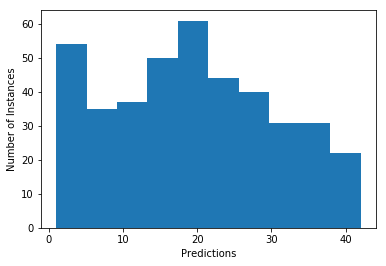

In [63]:
plt.hist(my_prediction)
plt.xlabel("Predictions")
plt.ylabel("Number of Instances")
plt.show()